In [3]:
import pandas as pd
partidos=pd.read_csv('/content/ches_la_2020_aggregate_level_v01.csv', encoding='latin1')

In [4]:
partidos=partidos[partidos['country_abb']=='AR']

In [5]:
partidos['party'].unique()

array(['Frente de Todos', 'Juntos por el Cambio', 'Consenso Federal',
       'Frente de Izquierda - Unidad', 'Alberto Fernández'], dtype=object)

In [6]:
votos=pd.read_csv('/content/presentacionDeResultados.csv')

/tmp/ipython-input-3090691866.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  votos=pd.read_csv('/content/presentacionDeResultados.csv')


In [7]:
votos['agrupacion_nombre'].unique()

array(['undefined', 'JUNTOS POR EL CAMBIO', 'FRENTE NOS',
       'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD',
       'CONSENSO FEDERAL', 'FRENTE DE TODOS',
       'UNITE POR LA LIBERTAD Y LA DIGNIDAD'], dtype=object)

In [8]:
import pandas as pd

# Supongamos que ya cargaste las dos bases:
# partidos = pd.read_csv('partidos.csv')
# votos = pd.read_csv('votos.csv')

# 1. Normalizamos texto
partidos['party_clean'] = partidos['party'].str.upper().str.strip()
votos['agrupacion_clean'] = votos['agrupacion_nombre'].str.upper().str.strip()

# 2. Creamos un diccionario de equivalencias
mapeo = {
    'FRENTE DE TODOS': 'Frente de Todos',
    'JUNTOS POR EL CAMBIO': 'Juntos por el Cambio',
    'CONSENSO FEDERAL': 'Consenso Federal',
    'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'Frente de Izquierda - Unidad',
    'ALBERTO FERNÁNDEZ': 'Frente de Todos',  # si querés agruparlo
    'FRENTE NOS': None,
    'UNITE POR LA LIBERTAD Y LA DIGNIDAD': None,
    'UNDEFINED': None
}

# 3. Aplicamos el mapeo
votos['party'] = votos['agrupacion_clean'].map(mapeo)

# 4. Hacemos el merge
merged = votos.merge(partidos, on='party', how='left')

In [9]:
latinobarometro = pd.read_stata('/content/Latinobarometro_2020_Esp_Stata_v1_0.dta')
# Limpiar espacios y normalizar mayúsculas/minúsculas
latinobarometro['idenpa_clean'] = latinobarometro['idenpa'].str.strip().str.upper()

# Filtrar por Argentina
argentina = latinobarometro[latinobarometro['idenpa_clean'] == 'ARGENTINA']

In [10]:
argentina

,numinves,idenpa,numentre,reg,ciudad,tamciud,comdist,edad,sexo,codigo,...,s28_b,s29,s30,reeduc_1,reeduc_2,reedad,perpart,fampart,wt,idenpa_clean
0,2020,Argentina,3200001,AR: Metropolitana,AR: Buenos Aires-Presidente Peron,No preguntada,2,63,Mujer,No preguntada,...,No aplicable,Profesional,No preguntada,BÃ¡sica incompleta,Analfabeto,61 y mÃ¡s,No menciona partido,Perdidos,2.20,ARGENTINA
1,2020,Argentina,3200002,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,No preguntada,1,24,Hombre,No preguntada,...,No aplicable,No aplicable,No preguntada,Superior Incompleta,BÃ¡sica completa,16-25,Gobierno,Partidos Social DemÃ³cratas,0.62,ARGENTINA
2,2020,Argentina,3200003,AR: Metropolitana,AR: Buenos Aires-Suipacha,No preguntada,280,20,Hombre,No preguntada,...,No aplicable,"Trabajador por cuenta propia, ambulante",No preguntada,BÃ¡sica incompleta,BÃ¡sica incompleta,16-25,No menciona partido,Perdidos,2.93,ARGENTINA
3,2020,Argentina,3200004,AR: Metropolitana,AR: Buenos Aires-Necochea,No preguntada,230,54,Mujer,No preguntada,...,Agricultor/Pescador,No aplicable,No preguntada,BÃ¡sica completa,BÃ¡sica completa,41-60,Otro,Perdidos,1.92,ARGENTINA
4,2020,Argentina,3200005,AR: Noroeste/TucumÃ¡n,AR: TucumÃ¡n-Lules,No preguntada,926,38,Hombre,No preguntada,...,No aplicable,No aplicable,No preguntada,BÃ¡sica completa,BÃ¡sica completa,26-40,OposiciÃ³n,Partidos Social DemÃ³cratas,2.73,ARGENTINA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2020,Argentina,3201196,AR: Noroeste/Catamarca,AR: Buenos Aires-Gran Buenos Aires,No preguntada,13,18,Hombre,No preguntada,...,No aplicable,"Trabajador por cuenta propia, ambulante",No preguntada,"Secundaria, media, tÃ©cnica completa","Secundaria, media, tÃ©cnica completa",16-25,No menciona partido,Perdidos,1.25,ARGENTINA
1196,2020,Argentina,3201197,AR: Pampeana/Santa FÃ©,AR: Santa FÃ©-Gran Rosario,No preguntada,8,60,Mujer,No preguntada,...,No aplicable,No aplicable,No preguntada,BÃ¡sica completa,BÃ¡sica completa,41-60,No menciona partido,Perdidos,1.92,ARGENTINA
1197,2020,Argentina,3201198,AR: Pampeana/Santa FÃ©,AR: Capital Federal-Ciudad de Buenos Aires,No preguntada,31,41,Hombre,No preguntada,...,No aplicable,No aplicable,No preguntada,BÃ¡sica completa,Sin dato,41-60,No menciona partido,Perdidos,2.13,ARGENTINA
1198,2020,Argentina,3201199,AR: Pampeana/Santa FÃ©,AR: Santa FÃ©-General LÃ³pez,No preguntada,872,38,Hombre,No preguntada,...,No aplicable,No aplicable,No preguntada,"Secundaria, media, tÃ©cnica incompleta",Analfabeto,26-40,No menciona partido,Perdidos,1.16,ARGENTINA


In [11]:
city_mapping = {
    # Comunas → Capital Federal
    'Comuna 01':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 02':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 03':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 04':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 05':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 06':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 07':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 08':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 09':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 10':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 11':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 12':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 13':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 14':'AR: Capital Federal-Ciudad de Buenos Aires',
    'Comuna 15':'AR: Capital Federal-Ciudad de Buenos Aires',

    # Partidos y ciudades de Buenos Aires / GBA
    'Campana':'AR: Buenos Aires-Campana',
    'Escobar':'AR: Buenos Aires-Escobar',
    'General Las Heras':'AR: Buenos Aires-General Las Heras',
    'General Rodríguez':'AR: Buenos Aires-General Rodriguez',
    'General San Martín':'AR: Buenos Aires-General San Martín',
    'San Miguel':'AR: Buenos Aires-San Miguel (GBA)',
    'Luján':'AR: Buenos Aires-Luján',
    'Marcos Paz':'AR: Buenos Aires-Marcos Paz',
    'Mercedes':'AR: Buenos Aires-Mercedes',
    'Merlo':'AR: Buenos Aires-Merlo',
    'Moreno':'AR: Buenos Aires-Moreno',
    'Morón':'AR: Buenos Aires-Morón',
    'Navarro':'AR: Buenos Aires-Navarro',
    'Pilar':'AR: Buenos Aires-Pilar',
    'San Fernando':'AR: Buenos Aires-San Fernando',
    'San Isidro':'AR: Buenos Aires-San Isidro',
    'Suipacha':'AR: Buenos Aires-Suipacha',
    'Tigre':'AR: Buenos Aires-Tigre',
    'Tres de Febrero':'AR: Buenos Aires-Tres de Febrero',
    'Vicente López':'AR: Buenos Aires-Vicente López',
    'José C. Paz':'AR: Buenos Aires-José C. Paz',
    'Malvinas Argentinas':'AR: Buenos Aires-Malvinas Argentinas',
    'Ituzaingó':'AR: Buenos Aires-Ituzaingó',
    'Hurlingham':'AR: Buenos Aires-Hurlingham (GBA)',
    'Baradero':'AR: Buenos Aires-Baradero',
    'Colón':'AR: Entre Ríos-Colon',
    'Exaltación de la Cruz':'AR: Buenos Aires-Exaltación de la Cruz',
    'Pergamino':'AR: Buenos Aires-Pergamino',
    'Ramallo':'AR: Buenos Aires-Ramallo',
    'Rojas':'AR: Buenos Aires-Rojas',
    'San Andrés de Giles':'AR: Buenos Aires-San Andrés de Giles',
    'San Nicolás':'AR: Buenos Aires-San Nicolás',
    'Zárate':'AR: Buenos Aires-Zárate',
    'Almirante Brown':'AR: Buenos Aires-Almirante Brown',
    'Avellaneda':'AR: Buenos Aires-Avellaneda',
    'Berazategui':'AR: Buenos Aires-Berazategui',
    'Esteban Echeverría':'AR: Buenos Aires-Esteban Echeverría',
    'Florencio Varela':'AR: Buenos Aires-Florencio Varela',
    'La Matanza':'AR: Buenos Aires-La Matanza',
    'Lanús':'AR: Buenos Aires-Lanús',
    'Lobos':'AR: Buenos Aires-Lobos',
    'Lomas de Zamora':'AR: Buenos Aires-Lomas de Zamora',
    'Quilmes':'AR: Buenos Aires-Quilmes',
    'Presidente Perón':'AR: Buenos Aires-Presidente Peron',
    'Ezeiza':'AR: Buenos Aires-Ezeiza (GBA)-Unión',
    'Maipú':'AR: Buenos Aires-Maipú',
    'Mar de Plata':'AR: Buenos Aires-Mar de Plata-General Pueyrredón',
    'La Plata':'AR: Buenos Aires-La Plata',
    'Bahía Blanca':'AR: Buenos Aires-Bahía Blanca',
    'Necochea':'AR: Buenos Aires-Necochea',
    'Tapalqué':'AR: Buenos Aires-Tapalqué',
    'Tandil':'AR: Buenos Aires-Tandil',
    'Pinamar':'AR: Buenos Aires-Pinamar',
    'General Alvarado':'AR: Buenos Aires-General Alvarado',
    'Castelli':'AR: Buenos Aires-Castelli',
    'Las Flores':'AR: Buenos Aires-Las Flores',
    'San Justo':'AR: Buenos Aires-La Matanza-San Justo',
    'Benito Juárez':'AR: Buenos Aires-Benito Juárez',
    'Tordillo':'AR: Buenos Aires-Tordillo',
    'Trenque Lauquen':'AR: Buenos Aires-Trenque Lauquen',
    'Chivilcoy':'AR: Buenos Aires-Chivilcoy',
    'Chacabuco':'AR: Buenos Aires-Chacabuco',
    'Baradero':'AR: Buenos Aires-Baradero',
    'Coronel Pringles':'AR: Buenos Aires-Coronel Pringles',
    'Coronel Dorrego':'AR: Buenos Aires-Coronel Dorrego',
    'Olavarría':'AR: Buenos Aires-Olavarría',
    'General Viamonte':'AR: Buenos Aires-General Viamonte',
    'General Villegas':'AR: Buenos Aires-General Villegas',
    'Lincoln':'AR: Buenos Aires-Lincoln',
    '9 de Julio':'AR: Buenos Aires-9 de Julio',
    'Pehuajó':'AR: Buenos Aires-Pehuajó',
    'Zárate':'AR: Buenos Aires-Zárate',
    'San Fernando':'AR: Buenos Aires-San Fernando',

    # Provincias con ciudades específicas
    'Lules':'AR: Tucumán-Lules',
    'Tafí Viejo':'AR: Tucumán-Tafí Viejo',
    'Yerba Buena':'AR: Tucumán-Yerba Buena',
    'Gran Rosario':'AR: Santa Fé-Gran Rosario',
    'Santa Fe':'AR: Santa Fé-Santa Fé',
    'General López':'AR: Santa Fé-General López',
    'San Cristóbal':'AR: Santa Fé-San Cristóbal',
    'Las Colonias':'AR: Santa Fé-Las Colonias',
    'San Jerónimo':'AR: Santa Fé-Las Colonias-San Jerónimo',
    'Castellanos':'AR: Santa Fé-Castellanos',
    'San Lorenzo':'AR: Santa Fé-San Lorenzo',
    'Gran Paraná':'AR: Entre Ríos-Gran Paraná',
    'Diamante':'AR: Entre Ríos-Diamante',
    'Gualeguaychú':'AR: Entre Ríos-Gualeguaychú',
    'Islas del Ibicuy':'AR: Entre Ríos-Islas del Ibicuy',
    'Villaguay':'AR: Entre Ríos-Villaguay',
    'San Antonio de Padua de la Concordia':'AR: Entre Ríos-San Antonio de Padua de la Concordia',
    'Federación':'AR: Entre Ríos-Federación',
    'Colón':'AR: Entre Ríos-Colon',

    'Luján de Cuyo':'AR: Mendoza-Luján de Cuyo',
    'General Alvear':'AR: Mendoza-General Alvear',
    'San Rafael':'AR: Mendoza-San Rafael',
    'Las Heras':'AR: Mendoza-Las Heras',
    'Tunuyán':'AR: Mendoza-Tunuyán',
    'Tupungato':'AR: Mendoza-Tupungato',
    'Rivadavia':'AR: Mendoza-Rivadavia',

    'Bariloche':'AR: Río Negro-Bariloche',
    'General Roca':'AR: Río Negro-General Roca',
    'Pilcaniyeu':'AR: Río Negro-Pilcaniyeu',
    'Carmen de Patagones':'AR: Río Negro-Carmen de Patagones',

    'Zapala':'AR: Neuquén-Zapala',
    'Confluencia':'AR: Neuquén-Confluencia',
    'Huiliches':'AR: Neuquén-Huiliches',
    'Lácar':'AR: Neuquén-Lácar',

    'Río Grande':'AR: Tierra del Fuego-Río Grande',
    'Río Chico':'AR: Tierra del Fuego-Río Chico',
    'Ushuaia':'AR: Tierra del Fuego-Ushuaia'
}

# Todos los que no estén en el diccionario se pueden asignar a 'No documentado' automáticamente:
all_merged_names = list(merged['seccion_nombre'].unique())
for name in all_merged_names:
    if name not in city_mapping:
        city_mapping[name] = 'No documentado'


merged['ciudad_estandarizada'] = merged['seccion_nombre'].map(city_mapping)

In [12]:
argentina = argentina[['ciudad', 'p1st']]

In [13]:
argentina['ciudad'] = argentina['ciudad'].astype(str).str.strip()
merged['ciudad_estandarizada'] = merged['ciudad_estandarizada'].astype(str).str.strip()

/tmp/ipython-input-2318456997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina['ciudad'] = argentina['ciudad'].astype(str).str.strip()


In [14]:
merged = merged[merged['ciudad_estandarizada'].notna()]  # elimina NaN
merged = merged[~merged['ciudad_estandarizada'].str.contains('No documentado', case=False, na=False)]

In [15]:
conversion = {
    "No muy satisfecho": 2,
    "Para nada satisfecho": 1,
    "Bastante satisfecho": 3,
    "Muy satisfecho": 4
}

# Reemplazar valores en la columna P1ST
argentina["felicidad"] = argentina["p1st"].map(conversion)

/tmp/ipython-input-4282321595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina["felicidad"] = argentina["p1st"].map(conversion)


In [16]:
import pandas as pd

# Promedio de felicidad por ciudad
felicidad_ciudad = argentina.groupby('ciudad')['felicidad'].mean().reset_index()
felicidad_ciudad.rename(columns={'p1st': 'p1st_promedio'}, inplace=True)

In [17]:
# Primero sumamos votos por ciudad y partido
votos_ciudad = merged.groupby(['ciudad_estandarizada', 'party_clean'])['votos_cantidad'].sum().reset_index()

# Luego calculamos la proporción del voto por partido
votos_ciudad['total_ciudad'] = votos_ciudad.groupby('ciudad_estandarizada')['votos_cantidad'].transform('sum')
votos_ciudad['prop'] = votos_ciudad['votos_cantidad'] / votos_ciudad['total_ciudad']


In [44]:
merged.columns

Index(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccion_id',
       'seccion_nombre', 'circuito_id', 'mesa_id', 'mesa_electores',
       'mesa_tipo', 'cargo_id', 'cargo_nombre', 'votos_tipo', 'votos_cantidad',
       'agrupacion_id', 'agrupacion_nombre', 'seccionprovincial_nombre',
       'agrupacion_clean', 'party', 'Unnamed: 0', 'country_id', 'country_abb',
       'country', 'country_en', 'party_id', 'party_abb', 'party_en',
       'president', 'wave', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'covid_ec', 'covid_ex', 'immigrate_policy',
       'immigrate_salience', 'redistribution', 'redist_salience',
       'environment', 'enviro_salience', 'spendvtax', 'spendvtax_salience',
       'deregulation', 'deregulation_salience', 'sociallifestyle',
       'sociallifestyle_salience', 'religious_principles',
 

In [49]:
import numpy as np
import pandas as pd

def esteban_ray(df, value_col='lrgen', weight_col='share', alpha=1.3):
    """
    Calcula el índice de polarización de Esteban-Ray.
    df: DataFrame con columnas de valor (ideología) y peso (votos relativos)
    alpha: parámetro de identificación (1 ≤ α ≤ 1.6)
    """
    f = df[weight_col].values
    y = df[value_col].values

    # Normalizar pesos
    f = f / f.sum()

    # Matriz de distancias |yi - yj|
    dist = np.abs(y[:, None] - y)

    # Cálculo del índice
    P = 0.5 * np.sum((f[:, None] ** (1 + alpha)) * f[None, :] * dist)
    return P


# --- Preparamos los datos ---
# Sumamos votos por ciudad y partido
votos_ciudad = (
    merged.groupby(['ciudad_estandarizada', 'party', 'lrgen'], as_index=False)['votos_cantidad']
    .sum()
)

# Calculamos proporción de votos (share)
votos_ciudad['total_ciudad'] = votos_ciudad.groupby('ciudad_estandarizada')['votos_cantidad'].transform('sum')
votos_ciudad['share'] = votos_ciudad['votos_cantidad'] / votos_ciudad['total_ciudad']

# --- Aplicamos Esteban-Ray por ciudad ---
polarizacion_ciudad = (
    votos_ciudad.groupby('ciudad_estandarizada')
    .apply(lambda x: esteban_ray(x, value_col='lrgen', weight_col='share'))
    .reset_index(name='ER')
)

polarizacion_ciudad.head()

/tmp/ipython-input-897155921.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: esteban_ray(x, value_col='lrecon', weight_col='share'))


,ciudad_estandarizada,ER
0,AR: Buenos Aires-9 de Julio,0.353452
1,AR: Buenos Aires-Almirante Brown,0.295787
2,AR: Buenos Aires-Avellaneda,0.312870
3,AR: Buenos Aires-Bahía Blanca,0.324823
4,AR: Buenos Aires-Baradero,0.332813


In [50]:
# Merge felicidad con polarización
resultado = pd.merge(felicidad_ciudad, polarizacion_ciudad,
                     left_on='ciudad', right_on='ciudad_estandarizada',
                     how='inner')

# Resultado final
resultado = resultado[['ciudad', 'felicidad', 'ER']]
resultado.head()


,ciudad,felicidad,ER
0,AR: Buenos Aires-9 de Julio,3.000000,0.353452
1,AR: Buenos Aires-Almirante Brown,2.600000,0.295787
2,AR: Buenos Aires-Avellaneda,2.789474,0.312870
3,AR: Buenos Aires-Baradero,4.000000,0.332813
4,AR: Buenos Aires-Berazategui,2.600000,0.295570


In [53]:
# Tabla del promedio ideológico por partido
tabla_lrgen = (
    merged.groupby('party')['lrgen']
    .agg(['mean', 'std', 'min', 'max', 'count'])
    .sort_values('mean')
    .round(2)
)

# Mostrar tabla ordenada de izquierda a derecha
tabla_lrgen


,mean,std,min,max,count
party,,,,,
Frente de Izquierda - Unidad,1.44,0.0,1.44,1.44,48777
Frente de Todos,3.56,0.0,3.56,3.56,48777
Consenso Federal,6.06,0.0,6.06,6.06,48777
Juntos por el Cambio,7.17,0.0,7.17,7.17,48777


In [51]:
from scipy.stats import pearsonr

# Calcular correlación y p-valor
corr, pval = pearsonr(resultado['felicidad'], resultado['ER'])

print(f"Correlación de Pearson: {corr:.3f}")
print(f"Valor p: {pval:.5f}")

# Interpretación rápida
if pval < 0.01:
    print("→ Significativa al 1% (***)")
elif pval < 0.05:
    print("→ Significativa al 5% (**)")
elif pval < 0.10:
    print("→ Significativa al 10% (*)")
else:
    print("→ No significativa")

Correlación de Pearson: 0.264
Valor p: 0.05347
→ Significativa al 10% (*)


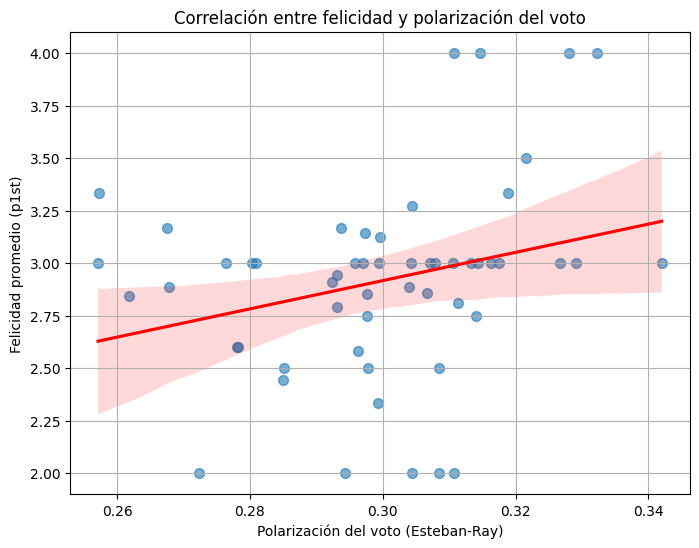

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='ER', y='felicidad', data=resultado, scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Polarización del voto (Esteban-Ray)')
plt.ylabel('Felicidad promedio (p1st)')
plt.title('Correlación entre felicidad y polarización del voto')
plt.grid(True)
plt.show()
